<a href="https://colab.research.google.com/github/Lalith-Chandra/GameTheory/blob/main/GameTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

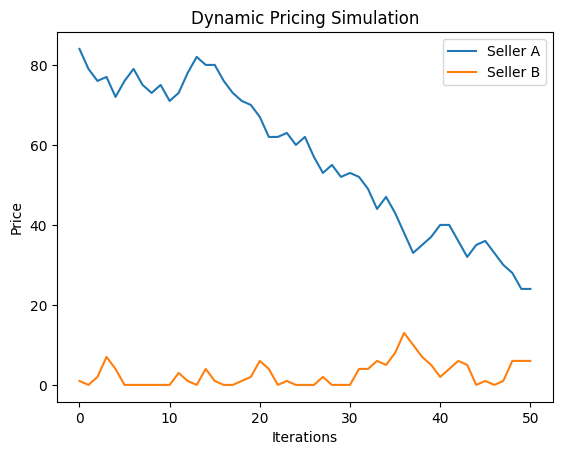

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Market:
    def __init__(self, demand_func):
        self.demand_func = demand_func

    def demand(self, price):
        return self.demand_func(price)

class Seller:
    def __init__(self, strategy):
        self.strategy = strategy

    def set_price(self, market, own_price, competitor_price):
        return self.strategy(market, own_price, competitor_price)

def simple_demand(price):
    return 100 - 2 * price

def dynamic_pricing_strategy(market, own_price, competitor_price):
    demand = market.demand(own_price)
    if demand == 0:
        return own_price  # If no demand, maintain current price
    else:
        price = own_price + np.random.randint(-5, 6)  # Add random noise to the price
        return max(0, min(price, 100))  # Ensure price is within bounds [0, 100]

def run_simulation(market, seller_a, seller_b, num_iterations):
    prices_a = [np.random.randint(0, 101)]  # Initial price for seller A
    prices_b = [np.random.randint(0, 101)]  # Initial price for seller B

    for _ in range(num_iterations):
        price_a = seller_a.set_price(market, prices_a[-1], prices_b[-1])
        price_b = seller_b.set_price(market, prices_b[-1], prices_a[-1])
        prices_a.append(price_a)
        prices_b.append(price_b)

    return prices_a, prices_b

def plot_prices(prices_a, prices_b):
    plt.plot(prices_a, label='Seller A')
    plt.plot(prices_b, label='Seller B')
    plt.xlabel('Iterations')
    plt.ylabel('Price')
    plt.title('Dynamic Pricing Simulation')
    plt.legend()
    plt.show()

# Define market and sellers
market = Market(simple_demand)
seller_a = Seller(dynamic_pricing_strategy)
seller_b = Seller(dynamic_pricing_strategy)

# Run simulation
num_iterations = 50
prices_a, prices_b = run_simulation(market, seller_a, seller_b, num_iterations)

# Plot prices over time
plot_prices(prices_a, prices_b)
